# Problem 12

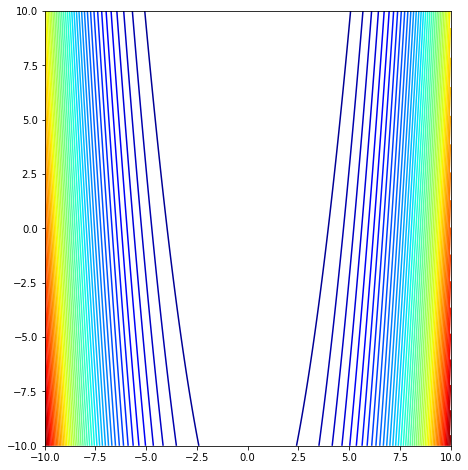

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = 10*(x2 - x1**2)**2 + (1-x1)**2

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

In [178]:
import sympy as sym
x0 = sym.Symbol('x0')
x1 = sym.Symbol('x1')
phi_1 = 10*(x1 - x0**2)**2 + (1-x0)**2
phi_1_x0 = phi_1.diff(x0)
phi_1_x0.diff(x1)

phi_1_x1 = phi_1.diff(x1)
phi_1_x1.diff(x1)

-40*x0

In [200]:
def objective_function(x):
    return 10*(x[1] - x[0]**2)**2 + (1-x[0])**2

def jacobian(x):
    return np.array([-40*x[0]*(-x[0]**2 + x[1])+2*x[0]-2, -20*x[0]**2 + 20*x[1]])

def hessian(x):
    return np.array([[120*x[0]**2-40*x[1]+2,-40*x[0]],
                     [-40*x[0], 20]])

f_x = lambda x: -40*x[0]*(-x[0]**2 + x[1])+2*x[0]-2
f_y = lambda x: -20*x[0]**2 + 20*x[1]
f_xx = lambda x: 120*x[0]**2-40*x[1]+2
f_xy = lambda x: -40*x[0]
f_yy = lambda x: 20

In [205]:
f_yy([0,-1])

20

In [215]:
def quadratic_approx(x, x_0 = [0,-1]):
    return objective_function(x_0) + f_x(x_0)*(x[0] - x_0[0]) +\
           f_y(x_0)*(x[1] - x_0[1]) + 0.5*f_xx(x_0)*(x[0] - x_0[0])**2 +\
           f_xy(x_0)*(x[0] - x_0[0])*(x[1] - x_0[1]) +\
           0.5*f_yy(x_0)*(x[1] - x_0[1])**2

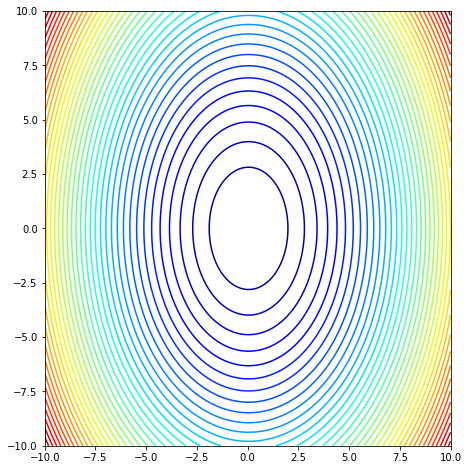

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = quadratic_approx(x=[x1, x2])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

## Part b

In [218]:
import numpy as np
import scipy as sp

def trust_region(obj_func, jac, hess, x0, delta_0, niter= 100):

    delta_ = delta_0
    lambda_ = 0
    identy_matrix = np.eye(len(x0))
    d_lambda = np.array([0,0])
    hessian = hess(x0)
    gradient = jac(x0)
    L= np.linalg.cholesky(hessian)
    for i in range(niter):
        d_lambda = -np.linalg.inv(hessian + lambda_*identy_matrix) @ gradient
        d_lambda_norm = np.linalg.norm(d_lambda)
        print(d_lambda_norm)
        if 0.75*delta_0 <= d_lambda_norm <= 1.5*delta_0:
            break
        else:
            w= np.linalg.inv(L) @ d_lambda
            lambda_ += (1 - (d_lambda_norm)/(delta_))*(-d_lambda_norm**2/(w.T @ w))
    return np.round(d_lambda, 3)

In [221]:
def objective_function(x):
    return 10*(x[1] - x[0]**2)**2 + (1-x[0])**2

def jacobian(x):
    return np.array([-40*x[0]*(-x[0]**2 + x[1])+2*x[0]-2, -20*x[0]**2 + 20*x[1]])

def hessian(x):
    return np.array([[120*x[0]**2-40*x[1]+2,-40*x[0]],
                     [-40*x[0], 20]])

trust_region(obj_func=objective_function, jac=jacobian, 
             hess=hessian, x0=np.array([0,-1]), 
             delta_0=1.25)

1.001133144839459


array([0.048, 1.   ])

## Part c

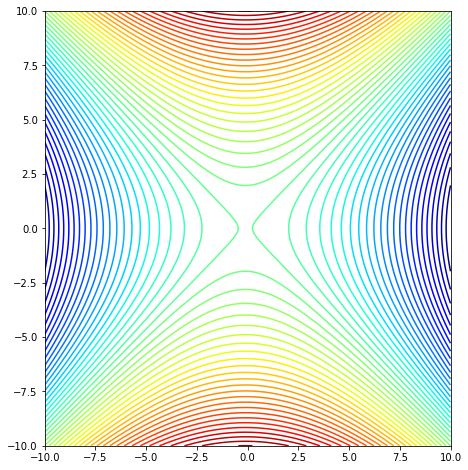

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = quadratic_approx(x=[x1, x2], x_0=(0, 0.5))

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

In [227]:
hessian([0,0.5])

array([[-18.,   0.],
       [  0.,  20.]])

In [224]:
trust_region(obj_func=objective_function, jac=jacobian, 
             hess=hessian, x0=np.array([0,0.5]), 
             delta_0=1.25)

LinAlgError: Matrix is not positive definite

# Problem 13

In [108]:
A = np.array([[2, -1, 0],[-1, 2, -1],[0, -1, 2]])
b = np.array([0,0,0])
x0 = np.array([0.0,1.0,2.0])

In [109]:
def hscg(A, b, x0, niter = 1000, tol= 1e-6):
    """
    This is the Python implementation CG-Algorithm via exact line search
    
    A, numpy array, is the A matrix in the decomposition
    b, numpy array, is the b matrix in the decomposition
    x0 is the initial point of the algorithm
    niter is the number of iterations, default is 1000
    """
    x_ = x0
    gk_ = A @ x_ + b
    d_ = -gk_
    for iteration in range(niter):
        print(np.round(x_, 3))
        lambda_ = (- gk_@ d_)/(d_ @ A @d_)
        if (np.abs(gk_) <= tol).all() :
            # break
            return x_
        else:
            x_ += lambda_*d_
            gk1_ = A @ x_ + b
            gamma_k1 = (gk1_ @ gk1_)/(gk_ @ gk_)
            d_ = -gk1_ + gamma_k1*d_
            gk_ = gk1_
    return x_

In [110]:
hscg(A, b, x0)

[0. 1. 2.]
[0.5 1.  0.5]
[0.556 0.444 0.333]
[0. 0. 0.]


array([1.11022302e-16, 5.55111512e-17, 0.00000000e+00])

In [105]:
from scipy.optimize import minimize
myfunc = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - x[0]*x[1] - x[1]*x[2]
minimize(myfunc, [0,1,2], method='Powell', tol=1e-6)

   direc: array([[-2.67397353e-01, -3.16500927e-01, -1.58250464e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.11316520e-04,  6.43568822e-04,  3.21784415e-04]])
     fun: 2.1775509271022898e-23
 message: 'Optimization terminated successfully.'
    nfev: 199
     nit: 6
  status: 0
 success: True
       x: array([-9.97465999e-18, -1.16009632e-17,  4.66641781e-12])

# Problem 15

In [2]:
from scipy.optimize import minimize
import numpy as np

x0 = np.array([-0.5, 1])
fun = lambda x: -12*x[1] + 4*x[0]**2 + 4*x[1]**2 - 4*x[0]*x[1]

res = minimize(fun, x0, method='CG', tol=1e-6)

In [53]:
fun([-0.5, 1])

-5.0

In [54]:
fun([1.5, 0])

9.0

In [55]:
fun([2.5, 3])

-5.0

## Part 3

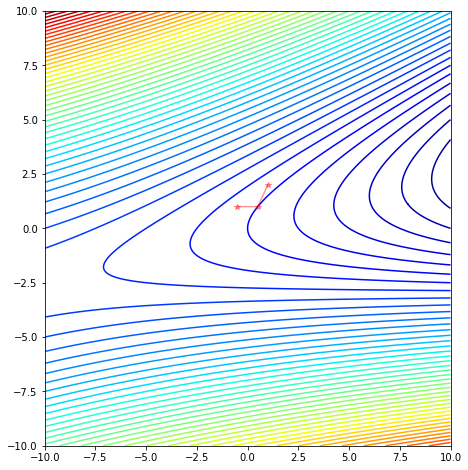

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
X,Y = np.meshgrid(X1, X2)
Z = -12*X + 4*Y**2 + 4*Y**2 - 4*X*Y

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
# ax = plt.axes()
#ax.plot_surface(X1, X2, Y,
#                cmap='binary')
ax.contour(X,Y,Z, 50, cmap = 'jet')

iter_x = [-0.5,0.5,1]
iter_y = [1, 1, 2]
# iter_z = [10,20,30]
ax.plot(iter_x, iter_y, color = 'r', marker = '*', alpha = .4)

# Problem 18

In [115]:
import numpy as np
import scipy as sci
import math

# use lambda function to define lambda function as stated in the original problem
myfun = lambda x: 0.5*(x[0]*math.exp(x[1]) - 3)**2 + 0.5*(x[0]*math.exp(x[1]*2) - 4)**2 + 0.5*(x[0]*math.exp(x[1]*4) - 6)**2 + \
        0.5*(x[0]*math.exp(x[1]*5) - 11)**2 + 0.5*(x[0]*math.exp(x[1]*8) - 20)**2

x0 = [3, 0.5]

new_earch_method = ['Nelder-Mead', 'Powell', 'CG', 'BFGS','TNC',  'L-BFGS-B', 'TNC', 
                    'trust-constr', 'SLSQP']

In [116]:
all_res = []
from scipy.optimize import minimize
for method_ in new_earch_method:
    print(method_)
    res_list = [method_]
    nelder = sci.optimize.minimize(myfun, x0, method=method_, tol=1e-6)
    res_list.append(np.round(nelder.nit, 3))
    res_list.extend(np.round(nelder.x, 3))
    res_list.append(np.round(nelder.fun, 3))
    all_res.append(res_list)

Nelder-Mead
Powell
CG
BFGS
TNC
L-BFGS-B
TNC
trust-constr
SLSQP


In [117]:
import pandas as pd 
pd.DataFrame(all_res)

,0,1,2,3,4
0,Nelder-Mead,58,2.541,0.260,2.247
1,Powell,8,2.541,0.260,2.247
2,CG,0,3.000,0.500,10805.973
3,BFGS,32,2.541,0.260,2.247
4,TNC,10,2.540,0.260,2.247
5,L-BFGS-B,16,2.541,0.260,2.247
6,TNC,10,2.540,0.260,2.247
7,trust-constr,986,2.541,0.260,2.247
8,SLSQP,2,-5.104,-189.594,291.000


Add Gradient

In [26]:
import sympy as sym
x0 = sym.Symbol('x0')
x1 = sym.Symbol('x1')
phi_1 = 0.5*(x0*sym.exp(x1) - 3)**2 + 0.5*(x0*sym.exp(x1*2) - 4)**2 + 0.5*(x0*sym.exp(x1*4) - 6)**2 + \
0.5*(x0*sym.exp(x1*5) - 11)**2 + 0.5*(x0*sym.exp(x1*8) - 20)**2
phi_1

0.5*(x0*exp(x1) - 3)**2 + 0.5*(x0*exp(2*x1) - 4)**2 + 0.5*(x0*exp(4*x1) - 6)**2 + 0.5*(x0*exp(5*x1) - 11)**2 + 0.5*(x0*exp(8*x1) - 20)**2

In [28]:
phi_0_prime = phi_1.diff(x0)
phi_0_prime

1.0*x0*(x0*exp(x1) - 3)*exp(x1) + 2.0*x0*(x0*exp(2*x1) - 4)*exp(2*x1) + 4.0*x0*(x0*exp(4*x1) - 6)*exp(4*x1) + 5.0*x0*(x0*exp(5*x1) - 11)*exp(5*x1) + 8.0*x0*(x0*exp(8*x1) - 20)*exp(8*x1)

In [29]:
print(phi_0_prime)

1.0*x0*(x0*exp(x1) - 3)*exp(x1) + 2.0*x0*(x0*exp(2*x1) - 4)*exp(2*x1) + 4.0*x0*(x0*exp(4*x1) - 6)*exp(4*x1) + 5.0*x0*(x0*exp(5*x1) - 11)*exp(5*x1) + 8.0*x0*(x0*exp(8*x1) - 20)*exp(8*x1)


In [30]:
phi_1_prime = phi_1.diff(x1)
phi_1_prime

1.0*(x0*exp(x1) - 3)*exp(x1) + 1.0*(x0*exp(2*x1) - 4)*exp(2*x1) + 1.0*(x0*exp(4*x1) - 6)*exp(4*x1) + 1.0*(x0*exp(5*x1) - 11)*exp(5*x1) + 1.0*(x0*exp(8*x1) - 20)*exp(8*x1)

In [31]:
print(phi_1_prime)

1.0*(x0*exp(x1) - 3)*exp(x1) + 1.0*(x0*exp(2*x1) - 4)*exp(2*x1) + 1.0*(x0*exp(4*x1) - 6)*exp(4*x1) + 1.0*(x0*exp(5*x1) - 11)*exp(5*x1) + 1.0*(x0*exp(8*x1) - 20)*exp(8*x1)


In [118]:
def obj_grad(x):
    return np.array([1.0*(x[0]*math.exp(x[1]) - 3)*math.exp(x[1]) + 1.0*(x[0]*math.exp(2*x[1]) - 4)*math.exp(2*x[1]) + 
                     1.0*(x[0]*math.exp(4*x[1]) - 6)*math.exp(4*x[1]) + 
            1.0*(x[0]*math.exp(5*x[1]) - 11)*math.exp(5*x[1]) + 1.0*(x[0]*math.exp(8*x[1]) - 20)*math.exp(8*x[1]),
                     
         1.0*x[0]*(x[0]*math.exp(x[1]) - 3)*math.exp(x[1]) + 2.0*x[0]*(x[0]*math.exp(2*x[1]) - 4)*math.exp(2*x[1]) +
                     4.0*x[0]*(x[0]*math.exp(4*x[1]) - 6)*math.exp(4*x[1]) + 
            5.0*x[0]*(x[0]*math.exp(5*x[1]) - 11)*math.exp(5*x[1]) + 8.0*x[0]*(x[0]*math.exp(8*x[1]) - 20)*math.exp(8*x[1])])

In [121]:
search_method = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B', 'TNC', 
                  'trust-constr', 'SLSQP', ]

all_res = []
from scipy.optimize import minimize
for method_ in search_method:
    print(method_)
    res_list = [method_]
    nelder = sci.optimize.minimize(myfun, x0, method=method_, tol=1e-6, jac=obj_grad)
    res_list.append(np.round(nelder.nit, 3))
    res_list.extend(np.round(nelder.x, 3))
    res_list.append(np.round(nelder.fun, 3))
    all_res.append(res_list)

Nelder-Mead
Powell
CG
BFGS
Newton-CG
L-BFGS-B
TNC
trust-constr


C:\Users\16477\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
C:\Users\16477\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


SLSQP


In [122]:
import pandas as pd 
pd.DataFrame(all_res)

,0,1,2,3,4
0,Nelder-Mead,58,2.541,0.260,2.247
1,Powell,8,2.541,0.260,2.247
2,CG,0,3.000,0.500,10805.973
3,BFGS,32,2.541,0.260,2.247
4,Newton-CG,15,2.541,0.260,2.247
5,L-BFGS-B,16,2.541,0.260,2.247
6,TNC,9,2.541,0.260,2.247
7,trust-constr,974,2.541,0.260,2.247
8,SLSQP,2,-5.104,-189.594,291.000


In [124]:
import pandas as pd
pd.DataFrame(all_res).to_csv("problem18_part2.csv")

## Part 2

### Curve Fitting Approach

### Least Squares Approach

In [126]:
import scipy as sci
from scipy.optimize import curve_fit

x0 = np.array([2.5, 0.5])
least_square_1 = sci.optimize.least_squares(myfun, x0)
print(least_square_1)

least_square_2 = sci.optimize.least_squares(myfun, x0, method='lm')
print(least_square_2)

 active_mask: array([0., 0.])
        cost: 3.672305785201768
         fun: array([2.71009438])
        grad: array([6.47390713, 5.42968948])
         jac: array([[2.38881242, 2.00350568]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 200
        njev: 148
  optimality: 6.473907132527178
      status: 0
     success: False
           x: array([2.93144206, 0.24013902])


ValueError: Method 'lm' doesn't work when the number of residuals is less than the number of variables.